In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy import stats

#import testing
import sys
sys.path.append("../")
import vuong_plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
#generate the sample
def gen_data(beta=3):
    nobs = 1000
    x = np.random.uniform(low=-3., high=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + beta * x[:,1] + e
    return y,x,nobs

yn,xn,nobs = gen_data()

In [18]:
def compute_loglike(resid):
    sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
    ll = np.log(stats.norm.pdf(resid,loc=0,scale=sigma))
    return ll

In [19]:
def compute_score(yn,xn,params):
    
    xn = sm.add_constant(xn)
    resid = yn - np.matmul(xn,params)
    
    k = len(params)
    scale = (resid**2).mean()
    
    tile_resid = np.tile( resid, k)
    tile_resid = np.reshape(tile_resid, (k,xn.shape[0]) ).transpose()
    grad = tile_resid*xn/scale     
    return grad
    
def compute_hess(yn,xn,params):
    pass


def setup_shi(yn,xn):
    x1n,x2n = xn[:,0:2],xn[:,1:3]
    
    # model 1 grad, etc.
    model1 = sm.OLS(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    k1 = len(model1_fit.params)
    
    ll1 = compute_loglike(model1_fit.resid)
    grad1 =  compute_score(yn,x1n,model1_fit.params)
    hess1 = model1.hessian(model1_fit.params)
    
    #model 2 grad, etc.
    model2 = sm.OLS(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    k2 = len(model1_fit.params)
    
    ll2 = compute_loglike(model2_fit.resid)
    grad2 =  compute_score(yn,x2n,model2_fit.params)
    hess2 = model2.hessian(model2_fit.params)
    
    return ll1,grad1,hess1,ll2,k1, grad2,hess2,k2

#yn,xn,nobs = gen_data()
ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 = setup_shi(yn,xn)

# Main examples

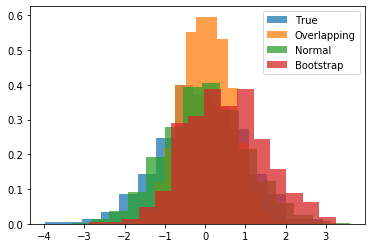

In [20]:
#generate the sample
def gen_data(beta=0):
    nobs = 500
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*x[:,2] + 1*x[:,0] + beta * x[:,1] + e
    return y,x,nobs


true_stats = vuong_plots.plot_true2(gen_data,setup_shi)

yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap2(yn,xn,nobs,setup_shi,c=0)
plt.legend()

plt.show()

In [21]:
overlap,normal = anayltic_stats

#print moments/kstats
for i in range(1,5):
    print('%s --------'%i)
    for distr in [true_stats,overlap,normal,bootstrap_stats]:
        m, k = stats.moment(distr, i), stats.kstat(distr, i)
        print(m,k)
    print('---------')
ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 = setup_shi(yn,xn)
thing1 = np.array(true_stats).mean()
thing2 = vuong_plots.compute_eigen2(ll1,grad1,hess1,ll2,k1, grad2,hess2,k2).sum()

sqrt_nobs = np.sqrt(yn.shape[0])
thing3 = sqrt_nobs*(ll1-ll2).mean()/ (ll1-ll2).std()
thing4 = np.array(bootstrap_stats).mean()
print('true mean:%s, eigen: %s, test_stat: %s, boot_mean:%s'%(thing1,thing2,thing3,thing4))

1 --------
0.0 -0.09901090619628382
0.0 0.03235280961959
0.0 0.01640273296446759
0.0 0.5062197114600354
---------
2 --------
1.0279291419010883 1.0299891201413711
0.3611410068527921 0.3612132495026925
0.9836170788343632 0.9838138416026839
0.9586572944657026 0.9605784513684397
---------
3 --------
-0.15311888933264428 -0.15404190844806503
-0.0016727758597491174 -0.0016737799938430365
0.05947224193622478 0.059507941940753865
0.07251356577360905 0.07295068628583387
---------
4 --------
3.4680406943811017 0.31516982898950935
0.3444578462391841 -0.046719531871308985
2.9099148271806428 0.008579930498646393
2.6613322201054115 -0.0859297778504961
---------
true mean:-0.09901090619628382, eigen: 0.288060773564923, test_stat: 0.5443060413948881, boot_mean:0.5062197114600354


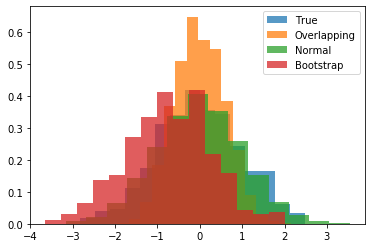

In [22]:
#generate the sample
def gen_data(beta=0):
    nobs = 1000
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*x[:,2] + 1*x[:,0] + beta * x[:,1] + e
    return y,x,nobs


true_stats = vuong_plots.plot_true2(gen_data,setup_shi)

yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap2(yn,xn,nobs,setup_shi,c=0)
plt.legend()

plt.show()

In [23]:
overlap,normal = anayltic_stats

#print moments/kstats
for i in range(1,5):
    print('%s --------'%i)
    for distr in [true_stats,overlap,normal,bootstrap_stats]:
        m, k = stats.moment(distr, i), stats.kstat(distr, i)
        print(m,k)
    print('---------')
ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 = setup_shi(yn,xn)
thing1 = np.array(true_stats).mean()
thing2 = vuong_plots.compute_eigen2(ll1,grad1,hess1,ll2,k1, grad2,hess2,k2).sum()

overlap,normal = anayltic_stats

sqrt_nobs = np.sqrt(yn.shape[0])
thing3 = sqrt_nobs*(ll1-ll2).mean()/ (ll1-ll2).std()
thing4 = np.array(bootstrap_stats).mean()
print('true mean:%s, eigen: %s, test_stat: %s, boot_mean:%s'%(thing1,thing2,thing3,thing4))

1 --------
0.0 -0.015780894260362888
0.0 -0.004855145161085423
0.0 -0.021326861453867616
0.0 -0.7341271813728194
---------
2 --------
0.9949124357308585 0.9969062482273132
0.3517766366578816 0.35184700605909347
0.9976332226850152 0.9978327892428639
0.9902292127496265 0.9922136400296858
---------
3 --------
-0.024885731178700993 -0.025035745364927756
0.01680840560767659 0.016818495359412607
-0.013414664253956255 -0.013422716810224868
-0.0825622171452262 -0.08305991213876195
---------
4 --------
2.7120854070487868 -0.2490816136529662
0.3363357912370043 -0.034804850326411334
2.9244855309241093 -0.060220788207763505
2.8435997762697305 -0.08753799058047322
---------
true mean:-0.015780894260362888, eigen: -0.009812368206353561, test_stat: -0.6982803867788824, boot_mean:-0.7341271813728194


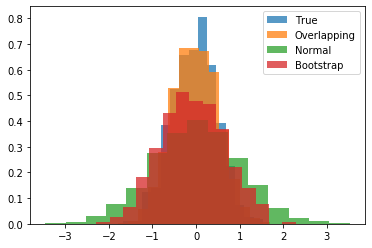

In [24]:
#generate the sample
def gen_data(beta=10):
    nobs = 1000
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y =  beta * x[:,1] + e
    return y,x,nobs

true_stats = vuong_plots.plot_true2(gen_data,setup_shi)

yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap2(yn,xn,nobs,setup_shi)
plt.legend()
plt.show()

In [25]:
overlap,normal = anayltic_stats

#print moments/kstats
for i in range(1,5):
    print('%s --------'%i)
    for distr in [true_stats,overlap,normal,bootstrap_stats]:
        m, k = stats.moment(distr, i), stats.kstat(distr, i)
        print(m,k)
    print('---------')
ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 = setup_shi(yn,xn)
thing1 = np.array(true_stats).mean()
thing2 = vuong_plots.compute_eigen2(ll1,grad1,hess1,ll2,k1, grad2,hess2,k2).sum()

overlap,normal = anayltic_stats

sqrt_nobs = np.sqrt(yn.shape[0])
thing3 = sqrt_nobs*(ll1-ll2).mean()/ (ll1-ll2).std()
thing4 = np.array(bootstrap_stats).mean()
print('true mean:%s, eigen: %s, test_stat: %s, boot_mean:%s'%(thing1,thing2,thing3,thing4))

1 --------
0.0 -0.03812702330408226
0.0 -0.014832678628296526
0.0 0.010852659424077482
0.0 -0.06469070298296782
---------
2 --------
0.25304339161953165 0.2535504926047411
0.26550936198064373 0.2655624744755389
0.9799331931297702 0.9801292189735649
0.5255519393901007 0.5266051496894796
---------
3 --------
-0.006420063638785794 -0.0064587645560053595
-0.00010641331463812698 -0.00010647719243542559
-0.01494164217163102 -0.014950611342387694
0.021652546043127507 0.021783070199764512
---------
4 --------
0.1805124076852211 -0.010966370328130373
0.1959062113110504 -0.015516587290207964
2.9017966206674863 0.02217254974172807
0.7466566857139274 -0.07976092024978326
---------
true mean:-0.03812702330408226, eigen: 0.004753145270312939, test_stat: 0.002862347086668188, boot_mean:-0.06469070298296782


# Other examples

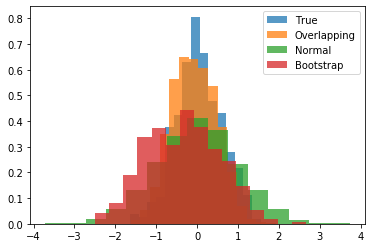

In [26]:
#generate the sample
def gen_data(beta=3):
    nobs = 500
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + .01*x[:,0] + beta * x[:,1] + e
    return y,x,nobs

true_stats = vuong_plots.plot_true2(gen_data,setup_shi)

yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap2(yn,xn,nobs,setup_shi)

plt.legend()
plt.show()

In [27]:
overlap,normal = anayltic_stats

#print moments/kstats
for i in range(1,5):
    print('%s --------'%i)
    for distr in [true_stats,overlap,normal,bootstrap_stats]:
        m, k = stats.moment(distr, i), stats.kstat(distr, i)
        print(m,k)
    print('---------')
ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 = setup_shi(yn,xn)
thing1 = np.array(true_stats).mean()
thing2 = vuong_plots.compute_eigen2(ll1,grad1,hess1,ll2,k1, grad2,hess2,k2).sum()

overlap,normal = anayltic_stats

sqrt_nobs = np.sqrt(yn.shape[0])
thing3 = sqrt_nobs*(ll1-ll2).mean()/ (ll1-ll2).std()
thing4 = np.array(bootstrap_stats).mean()
print('true mean:%s, eigen: %s, test_stat: %s, boot_mean:%s'%(thing1,thing2,thing3,thing4))

1 --------
0.0 0.0508131367139063
0.0 -0.06417860500036841
0.0 0.012213798951391536
0.0 -0.34258349917192327
---------
2 --------
0.3189264931876221 0.31956562443649505
0.2946803904361896 0.29473933830385035
0.9678186334489177 0.968012235896097
0.7934987189729222 0.7950888967664552
---------
3 --------
-0.002682731913429512 -0.0026989037446675914
0.01688332437413229 0.016893459098114433
-0.005181973138584315 -0.005185083774041956
0.04145322714470888 0.041703112192969384
---------
4 --------
0.2943245014052111 -0.009735284645009149
0.2296625153656002 -0.030785977363180953
2.8289421483107535 0.020075300260118042
1.5476651431872939 -0.3384286049040732
---------
true mean:0.0508131367139063, eigen: -0.32881292282626834, test_stat: -0.36890923780917384, boot_mean:-0.34258349917192327


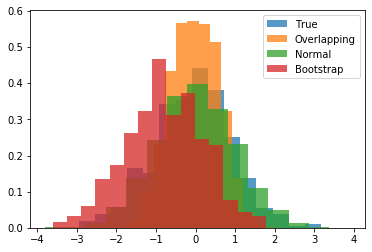

In [28]:
#generate the sample
def gen_data(beta=10):
    nobs = 1000
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = .1*x[:,2] + .1*x[:,0] + beta * x[:,1] + e
    return y,x,nobs

true_stats = vuong_plots.plot_true2(gen_data,setup_shi)

yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap2(yn,xn,nobs,setup_shi)
plt.legend()
plt.show()

In [29]:
overlap,normal = anayltic_stats

#print moments/kstats
for i in range(1,5):
    print('%s --------'%i)
    for distr in [true_stats,overlap,normal,bootstrap_stats]:
        m, k = stats.moment(distr, i), stats.kstat(distr, i)
        print(m,k)
    print('---------')
ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 = setup_shi(yn,xn)
thing1 = np.array(true_stats).mean()
thing2 = vuong_plots.compute_eigen2(ll1,grad1,hess1,ll2,k1, grad2,hess2,k2).sum()

overlap,normal = anayltic_stats

sqrt_nobs = np.sqrt(yn.shape[0])
thing3 = sqrt_nobs*(ll1-ll2).mean()/ (ll1-ll2).std()
thing4 = np.array(bootstrap_stats).mean()
print('true mean:%s, eigen: %s, test_stat: %s, boot_mean:%s'%(thing1,thing2,thing3,thing4))

1 --------
0.0 -0.06625648486143906
0.0 -0.014156612089173279
0.0 -0.0009816925727191106
0.0 -0.7793547114095646
---------
2 --------
0.956904919534603 0.9588225646639309
0.3567535459543891 0.35682491093657637
0.9863493336456944 0.9865466429742894
0.9745057123674552 0.9764586296267088
---------
3 --------
-0.10891857689362319 -0.10957515119961134
-0.001082702648332522 -0.0010833525732082138
0.0376544441018812 0.03767704731610721
-0.11850030186793332 -0.11921463596664542
---------
4 --------
2.895361349557131 0.161576819527809
0.3345084081958215 -0.04722425224639144
2.895490617132492 -0.02202800159986568
2.6250081195315684 -0.2156058400114071
---------
true mean:-0.06625648486143906, eigen: -0.1003861043098595, test_stat: -0.6957400144495056, boot_mean:-0.7793547114095646


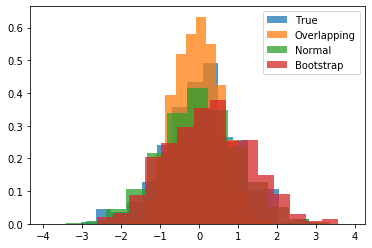

In [30]:
#generate the sample
def gen_data(beta=1):
    nobs = 1000
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + 2*x[:,2] + 2*x[:,0] + beta * x[:,1] + e

    return y,x,nobs

true_stats = vuong_plots.plot_true2(gen_data,setup_shi)

yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic2(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap2(yn,xn,nobs,setup_shi)
plt.legend()
plt.show()

In [31]:
overlap,normal = anayltic_stats

#print moments/kstats
for i in range(1,5):
    print('%s --------'%i)
    for distr in [true_stats,overlap,normal,bootstrap_stats]:
        m, k = stats.moment(distr, i), stats.kstat(distr, i)
        print(m,k)
    print('---------')
ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 = setup_shi(yn,xn)
thing1 = np.array(true_stats).mean()
thing2 = vuong_plots.compute_eigen2(ll1,grad1,hess1,ll2,k1, grad2,hess2,k2).sum()

overlap,normal = anayltic_stats

sqrt_nobs = np.sqrt(yn.shape[0])
thing3 = sqrt_nobs*(ll1-ll2).mean()/ (ll1-ll2).std()
thing4 = np.array(bootstrap_stats).mean()
print('true mean:%s, eigen: %s, test_stat: %s, boot_mean:%s'%(thing1,thing2,thing3,thing4))

1 --------
0.0 0.030148783232159755
0.0 -0.03650853794750854
0.0 0.003780450454846523
0.0 0.24915503765362718
---------
2 --------
0.9086656494148788 0.9104866226601992
0.3458044805907146 0.34587365532177894
0.9876136325025382 0.9878111947414866
1.1568116524034344 1.15912991222789
---------
3 --------
-0.14636645771409215 -0.14724877235806152
0.013362249844749806 0.01337027093769076
0.018425766422460212 0.01843682704374024
0.12971864010662407 0.1305005997000268
---------
4 --------
2.6812309863190777 0.21712364126346623
0.3209541024442963 -0.03769739497069908
3.032102545920213 0.10728082331665201
3.7504420060296377 -0.2516764842993312
---------
true mean:0.030148783232159755, eigen: -0.35237633209859465, test_stat: 0.2029010134939623, boot_mean:0.24915503765362718
